In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Calculation of Madelung Constant for Sodium chloride

In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid. It depe~ds on the charges on the other atoms nearby and their locations. Consider for instance solid sodium chloride-table salt. The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge +e and the chlorine ones a single negative charge -e, where e is the charge on the electron. If we label each position on the lattice by three integer coordinates (i, j, k), then the sodium atoms fall at positions where i + j + k is even, and the chlorine atoms at positions where i + j + k is odd.

In [2]:
x = np.arange(-10, 10.5, 1)
print(x)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [3]:
i = 0
j = 0
k = 0
i == j == k == 0


True

In [4]:

def find_madelung_constant(L):
    ii = np.arange(-L, L+0.1, 1)
    jj = np.arange(-L, L+0.1, 1)
    kk = np.arange(-L, L+0.1, 1) 
    sum = 0
    for i in ii:
        for j in jj:
            for k in kk:
                if (i+j+k)%2 == 0:
                    if (i == j == k == 0):
                        continue
                    V_ijk =  (-1)/(np.sqrt(i**2 + j**2 + k**2)) #*multiplied by e/(4*pi*epsilon)
                else:
                    V_ijk =  1/(np.sqrt(i**2 + j**2 + k**2)) 
                sum += V_ijk
    return sum  # value of M



In [5]:
find_madelung_constant(100)

1.7418198158396654

## 2. The semi-empirical mass formula
In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximate nuclear binding energy B of an atomic nucleus with atomic number Z and mass number A.
where, in units of millions of electron volts, the constants are a_1 = 15.8, a_2 = 18.3,
a_3 =0.714, a_4=23.2

### a. and b.

In [6]:
def semi_empirical_mass(A, Z):
    #parametrization
    a1 = 15.8
    a2 = 18.3
    a3 = 0.714
    a4 = 23.2
    if A%2 == 1: # i.e it is odd
        a5 = 0
    elif A%2 == Z%2 == 0: # A and Z are both even
        a5 = 12.0
    elif Z%2 == 1: # A is even and Z is odd
        a5 = -12.0
    #binding energy
    B = a1 * A - a2* A**(2/3) - a3 * (Z**2/A**(1/3)) - a4*((A - 2*Z)**2)/A + a5/A**(1/2)

    return B, B/A 



In [7]:
semi_empirical_mass(58, 28)

(497.5620206224374, 8.578655527973059)

###  c.

In [8]:
def semi_empirical_mass_2(Z):
    BperN = 0
    B_main = 0
    A_best = 0
    for A in range(Z, 3*Z + 1, 1):
        B, B_A = semi_empirical_mass(A, Z)
        if B_A >= BperN:
            BperN = B/A
            B_main = B
            A_best = A   
    return A_best
        

In [9]:
semi_empirical_mass_2(Z = 28)

62

### d.

In [10]:
def semi_empirical_mass_final():
    Z_list = []
    A_best = []
    BperN = 0
    Z_best = 0
    for Z in range(1, 101, 1):
        Z_list.append(Z)
        A = semi_empirical_mass_2(Z)
        A_best.append(A)
        B, B_N = semi_empirical_mass(A, Z)
        if B_N >= BperN:
            BperN = B_N
            Z_best = Z
    return Z_list, A_best, Z_best

In [11]:
semi_empirical_mass_final()

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [3,
  4,
  7,
  8,
  11,
  14,
  15,
  18,
  19,
  22,
  25,
  26,
  29,
  30,
  33,
  36,
  37,
  40,
  43,
  44,
  47,
  48,
  51,
  54,
  55,
  58,
  61,
  62,
  65,
  68,
  69,
  72,
  75,
  76,
  79,
  82,
  85,
  86,
  89,
  92,
  93,
  96,
  99,
  102,
  103,
  106,
  109,
  110,
  113,
  116,
  119,
  120,
  123,
  126,
  129,
  130,
  133,
  136,
  139,
  140,
  143,
  146,
  149,
  150,
  153,

## Exercise 2.11 Binomial Coefficients

In [18]:
def factorial(n):
    product = 1
    for i in range(1, n+1):
        product *= i
    return product
def binomial_coefficients(n,k):

    numerator = factorial(n)
    denominator = factorial(k)*factorial(n-k)
    binomial = numerator//denominator
    return binomial



In [27]:
binomial_coefficients(3, 0)

1

Pascal's traingle

In [39]:
def pascal_triangle(n):
    for m in range(1, n +1):
        binomials = []
        for k in range(m + 1):
            binomials.append(binomial_coefficients(m, k))
        print(*binomials)

pascal_triangle(20)


1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


In [50]:
# prabability that an unbiased coin, tossed n times, will come up heads/ k times is 

#P(k heads in n throws) = P(head in single throw)^(k) * (no of ways a given combination of k heads occurs in n throws) *P(tails)^(n - k)

def prob_coin_toss(k, n):
    prob_head = 0.5
    combinations = binomial_coefficients(n, k)
    total_prob = prob_head**n * (combinations)
    return total_prob


def cumulative_prob(k, n):
    #to sum prob for all  k < n
    cum_prob = 0
    for k_sub in range(0, k+1):
        cum_prob += prob_coin_toss(k_sub, n)
    return cum_prob



In [43]:

print(prob_coin_toss(50, 100))
print(cumulative_prob(50,100))

0.07958923738717877
0.5397946186935894


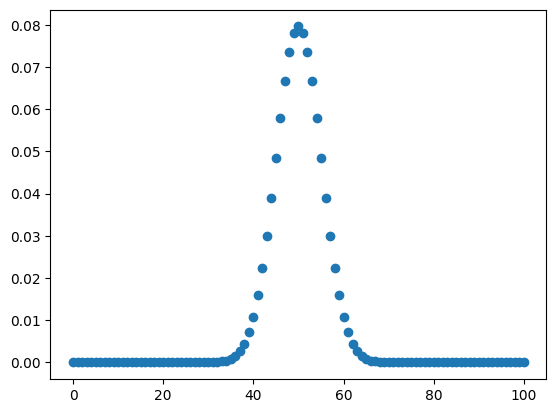

In [48]:
#pdf
n = np.arange(0, 101)
p = []
for k in n:
    p.append(prob_coin_toss(k, n = 100))
p = np.array(p)

plt.scatter(n, p)

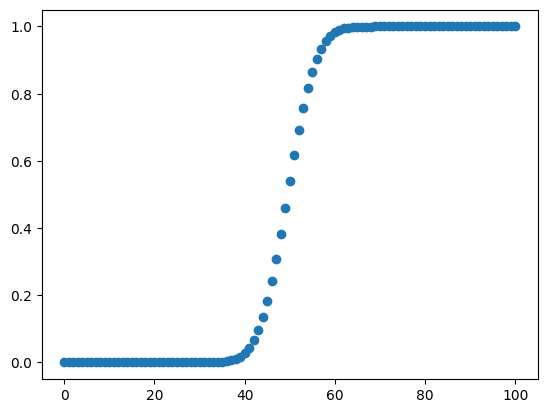

In [51]:
#cdf
cp = []
for k in n:
    cp.append(cumulative_prob(k, n = 100))
cp = np.array(cp)

plt.scatter(n, cp)

## Exercise 2.12 Prime Numbers

a) A number n is primer if it has no primer factors less than n. Hence we only need to check if it is divisible by other primes.

b) If a number n in non-prime, having a factor r, then n = r*s, where s is also a factor. if r >= sqrt(n) then n= rs .= sqrt(ns), which implies that s <= sqrt(n). thus to dertermine if a number is prime we have to check its primer factors only up to and including sqrt(n). If there are none then the number is prime.

c) If we find even a single primer facotr less than sqrt(n), then we know that the number is non-prime, and hence there is no need to check any further - we can abandon this number and move on to something else.



In [73]:
def find_primes_upto_(n):
    if n <= 2:
        raise ValueError("The input must be greater than 3")
    prime_list = [2]
    for k  in range(3, n+1):
        is_prime = True #A flag for whether the k is prime or not
        upper_bound = int(np.ceil(k**0.5))
        for prime in prime_list:
            if prime > upper_bound: #k is a prime number
                break
            elif k%prime == 0: #k is a composite number
                is_prime = False
                break
        if is_prime:
            prime_list.append(k)
    return prime_list

In [75]:
prime_list  = 

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

In [76]:
def prime_gaps(prime_list):
    index = []
    prime_gap = []
    for i in range(len(prime_list)-1):
        index.append(i + 1)
        prime_gap.append(prime_list[i +1]- prime_list[i])
    return index, prime_gap

In [85]:
prime_list = find_primes_upto_(10000000)


In [86]:
i,p = prime_gaps(prime_list)

(array([5.8981e+04, 5.8621e+04, 0.0000e+00, 9.9987e+04, 4.2352e+04,
        5.4431e+04, 0.0000e+00, 6.5513e+04, 3.5394e+04, 2.5099e+04,
        0.0000e+00, 4.3851e+04, 2.2084e+04, 1.9451e+04, 0.0000e+00,
        2.7170e+04, 1.2249e+04, 1.3255e+04, 2.1741e+04, 0.0000e+00,
        6.3640e+03, 6.7210e+03, 1.0194e+04, 0.0000e+00, 4.4980e+03,
        5.3180e+03, 7.1800e+03, 0.0000e+00, 2.7790e+03, 2.3260e+03,
        3.7840e+03, 0.0000e+00, 2.0480e+03, 1.4490e+03, 2.4030e+03,
        1.0720e+03, 0.0000e+00, 1.0520e+03, 1.8340e+03, 5.4300e+02,
        0.0000e+00, 5.5900e+02, 9.7300e+02, 3.5800e+02, 0.0000e+00,
        5.2400e+02, 4.6800e+02, 2.1800e+02, 0.0000e+00, 1.9400e+02,
        3.6200e+02, 1.6500e+02, 1.0000e+02, 0.0000e+00, 2.4700e+02,
        6.6000e+01, 7.1000e+01, 0.0000e+00, 1.4100e+02, 3.7000e+01,
        3.9000e+01, 0.0000e+00, 6.5000e+01, 2.9000e+01, 3.6000e+01,
        0.0000e+00, 3.4000e+01, 2.1000e+01, 1.2000e+01, 2.6000e+01,
        0.0000e+00, 1.1000e+01, 1.1000e+01, 1.10

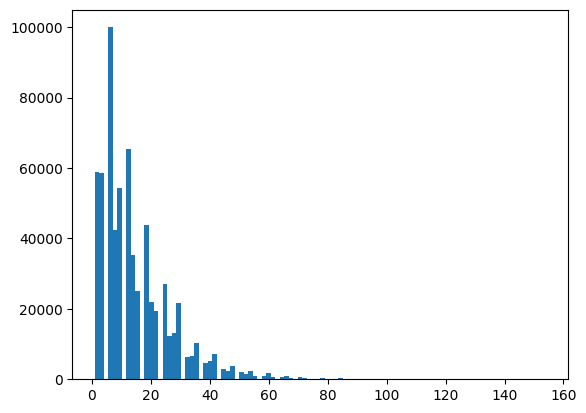

In [87]:
plt.hist(p, bins = 100)

### Exercise 2.13 Recursion

1. Factorial 

In [89]:
def factorial_by_recursion(n):
    if n == 1:
        return 1
    else:
        return n*factorial_by_recursion(n-1)

factorial_by_recursion(4)

24

2. Catalan NUmbers C_n

In [90]:
def generate_catalan_numbers(n):
    if n == 0:
        return 1
    else:
        return (4*n -2)*(generate_catalan_numbers(n-1))/(n+1)
    
generate_catalan_numbers(100)

8.96519947090131e+56

3. Greatest Common Divisor g(m,n)

In [92]:
def greatest_common_divisor(m,n): 
    if n == 0:
        return m
    else:

        return greatest_common_divisor(n, m%n)

greatest_common_divisor(108, 192)    

12